(pixel_classification.apoc)=
# 在支持OpenCL的GPU上进行像素分类
除了对象或"实例"分割外，我们还可以通过对像素进行分类来实现语义分割。

让我们先加载一个示例图像和一些地面真实标签：

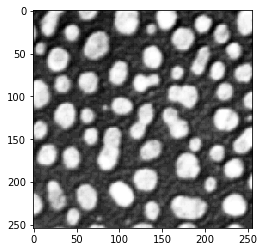

In [1]:
from skimage.io import imread
import matplotlib.pyplot as plt
import numpy as np
import apoc
import pyclesperanto_prototype as cle

image = imread('../../data/blobs.tif')
cle.imshow(image)

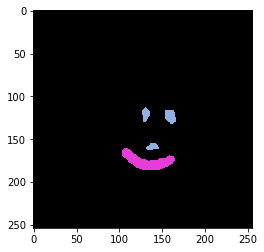

In [2]:
manual_annotations = imread('../../data/blobs_annotations.tif')

from skimage.io import imshow
cle.imshow(manual_annotations, labels=True)

## 训练
现在我们训练一个PixelClassifier，它的底层实际上是一个[scikit-learn RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)。训练完成后，分类器将被转换为[兼容clij的OpenCL代码](https://github.com/clEsperanto/clij-opencl-kernels)并以给定的文件名保存到磁盘。

In [3]:
# define features: original image, a blurred version and an edge image
features = "original gaussian_blur=2 sobel_of_gaussian_blur=2"

# this is where the model will be saved
cl_filename = 'my_model.cl'

apoc.erase_classifier(cl_filename)
clf = apoc.PixelClassifier(opencl_filename=cl_filename)
clf.train(features, manual_annotations, image)

## 预测
然后可以使用该分类器对给定图像中的所有像素进行分类。起点仍然是特征堆栈。因此，用户必须确保在训练和预测时使用相同的特征。

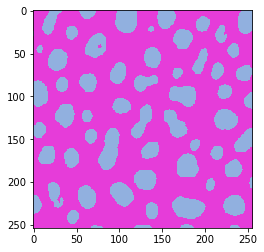

In [4]:
result = clf.predict(image=image)
cle.imshow(result, labels=True)